# Hypothesis Tests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stack_overflow = pd.read_feather("/home/umut/python_calismalar/stack_overflow.feather")
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [3]:
# A hypothesis : The mean annual compensation of the population of data scientists is $110,000

# Point estimate of the mean annual compensation
mean_comp_samp = stack_overflow["converted_comp"].mean()
mean_comp_samp

119574.71738168952

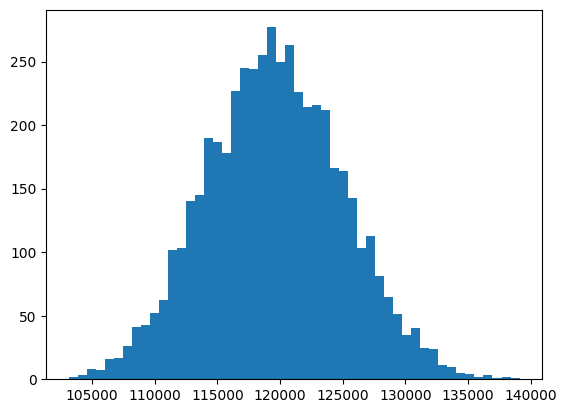

In [4]:
# Generating a bootstrap dist.

so_boot_distn = []

for i in range(5000):
    so_boot_distn.append(
        np.mean(
            stack_overflow.sample(frac=1, replace=True)["converted_comp"]
        )
    )

# Visualize of bootstrap dist.
plt.hist(so_boot_distn, bins=50)
plt.show()

In [5]:
hyp_mean = 110000
std_error = np.std(so_boot_distn, ddof=1)
z_score = (mean_comp_samp - hyp_mean)/std_error
print(z_score)

1.7519195762905524


## P value

In [6]:
# H0: Datascientist'lerin %35'i çocukken kod yazmaya başlamıştır. (age < 14)
prop_child_hyp = 0.35
# Ha: child >= %35
prop_child_samp = (stack_overflow['age_first_code_cut'] == 'child').mean()

In [7]:
bootstrap = []
for i in range(5000):
    bootstrap.append(
        np.mean(
            (stack_overflow.sample(frac=1, replace=True)['age_first_code_cut'] == 'child')
        )
    )

In [8]:
std_error = np.std(bootstrap, ddof=1)
# Calculate z_score:
z_score = (prop_child_samp - prop_child_hyp)/std_error
print('z_score is',z_score)

# Calculate p-val
from scipy.stats import norm
print('p-val is',1 - norm.cdf(z_score, loc=0, scale=1))

z_score is 4.039863601744827
p-val is 2.6741147774567153e-05


## T-test

In [9]:
xbar_adult, xbar_child = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
s_adult, s_child = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
n_adult, n_child = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()

# Calculating T-statistic.
t_stat = (xbar_child - xbar_adult) / np.sqrt(s_child**2/n_child + s_adult**2/n_adult)
print('test statistic value is',t_stat)

test statistic value is 1.8699313316221844


In [10]:
alpha = 0.1
deg_of_free = n_child+n_adult-2

from scipy.stats import t
# Calculating p-val
p_val = 1 - t.cdf(t_stat, df=deg_of_free)
print('p value is', p_val, 'and alpha value is', alpha, 'so we can reject H0')

p value is 0.030811302165157595 and alpha value is 0.1 so we can reject H0


## Paired T-test

In [11]:
repub_votes = pd.read_feather('/home/umut/python_calismalar/repub_votes_potus_08_12.feather')
sample_data = repub_votes[['repub_percent_08', 'repub_percent_12']]
sample_data

,repub_percent_08,repub_percent_12
0,38.957877,37.139882
1,56.726272,58.983452
2,38.896719,39.331367
3,42.923190,45.250693
4,74.522569,73.764757
...,...,...
95,48.342541,52.437478
96,37.490904,40.577038
97,38.104967,41.675050
98,76.684241,83.983328


In [12]:
sample_data.loc[:,'diff'] = (sample_data['repub_percent_08'] - sample_data['repub_percent_12'])
x_bar_diff = sample_data['diff'].mean()
n_diff = len(sample_data)
s_diff = sample_data['diff'].std()
dof = n_diff-1

t_stat = (x_bar_diff - 0)/np.sqrt(s_diff**2/n_diff)

from scipy.stats import t
p_value = t.cdf(t_stat, df = dof)
print(f't statistic value is {t_stat} and p value is {p_value}')

t statistic value is -5.601043121928489 and p value is 9.572537285272411e-08


/tmp/ipykernel_7049/1912496552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data.loc[:,'diff'] = (sample_data['repub_percent_08'] - sample_data['repub_percent_12'])


# PINGOUIN

Islem hamalligi olmadan test uygulamak

In [13]:
import pingouin

pingouin.ttest(x=sample_data['diff'], y=0, alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,0.999955


In [14]:
#Paired = True
pingouin.ttest(x=sample_data['repub_percent_08'], y=sample_data['repub_percent_12'], paired=True, alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


## ANOVA

In [15]:
import seaborn as sns

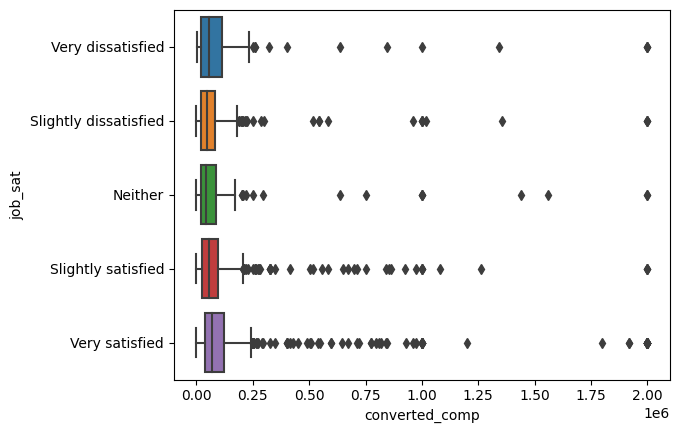

In [16]:
sns.boxplot(x= 'converted_comp', y='job_sat', data=stack_overflow)
plt.show()

In [17]:
alpha = 0.2
# dv: dependent variable
pingouin.anova(data=stack_overflow, dv='converted_comp', between='job_sat')

# so alpha 0.2 and p value 0.001315:  p < alpha, reject H0.

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


In [18]:
pingouin.pairwise_tests(data=stack_overflow, dv="converted_comp", between="job_sat", padjust="none")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931


In [19]:
pingouin.pairwise_tests(data=stack_overflow, dv="converted_comp", between="job_sat", padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


## One-Sample Proportion Test

In [20]:
# H0: proportion of Stack Overflow users age < 30 = 0.5
# HA: " "                                        != 0.5

# so p0:
p_0 = 0.5
print('p_0 is',p_0)
# We got alpha 0.01
alpha = 0.01 

# p_hat:
p_hat = stack_overflow['age_cat'].value_counts(normalize = True)[0]
print('p_hat is',p_hat)

# defining n:
n = len(stack_overflow)

# calculate z_Score:
z_score = (p_hat - p_0)/np.sqrt(p_0*(1 - p_0)/n)
print('z_score is',z_score)

# calculate p-val:
p_val = norm.cdf(-z_score) + (1-norm.cdf(z_score)) # ya da simetrik oldugu icin birisini al 2 ile carp
print('p_value is',p_val)

# Conclusion:
print(f'{p_val}(pvalue) < {alpha}(alpha), we reject the H0')

p_0 is 0.5
p_hat is 0.5356037151702786
z_score is 3.385911440783663
p_value is 0.0007094227368100493
0.0007094227368100493(pvalue) < 0.01(alpha), we reject the H0


## Two-Sample Proportion Test

In [21]:
#H0: Proportion of hobbyist users is the same for those under thirty as those at least thirty.
#H0: p>=30 - p<=30  = 0
#HA: p>=30 - p<=30 != 0

alpha=0.05

print(stack_overflow.groupby('age_cat')['hobbyist'].value_counts(),'\n')

n_hobbyist = np.array([812, 1021])
n_rows = np.array([812+238, 1021+190])

from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hobbyist, nobs=n_rows, alternative='two-sided')
print(f'z score is {z_score} and p value is {p_value}')

print(f'since p value < alpha is {p_value<alpha} we reject H0.')

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: count, dtype: int64 

z score is -4.223691463320559 and p value is 2.403330142685068e-05
since p value < alpha is True we reject H0.


## Test for independence of variables

In [22]:
import pingouin

In [23]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbyist', y='age_cat', correction=False)
print('STATS\n',stats,'\n')
print('EXPECTED\n',expected,'\n')
print('OBSERVED\n',observed)

STATS
                  test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  17.839570  1.0  0.000024  0.088826  0.988205
1        cressie-read  0.666667  17.818114  1.0  0.000024  0.088773  0.988126
2      log-likelihood  0.000000  17.802653  1.0  0.000025  0.088734  0.988069
3       freeman-tukey -0.500000  17.815060  1.0  0.000024  0.088765  0.988115
4  mod-log-likelihood -1.000000  17.848099  1.0  0.000024  0.088848  0.988236
5              neyman -2.000000  17.976656  1.0  0.000022  0.089167  0.988694 

EXPECTED
 age_cat   At least 30   Under 30
hobbyist                        
No          198.76161  229.23839
Yes         851.23839  981.76161 

OBSERVED
 age_cat   At least 30  Under 30
hobbyist                       
No                238       190
Yes               812      1021


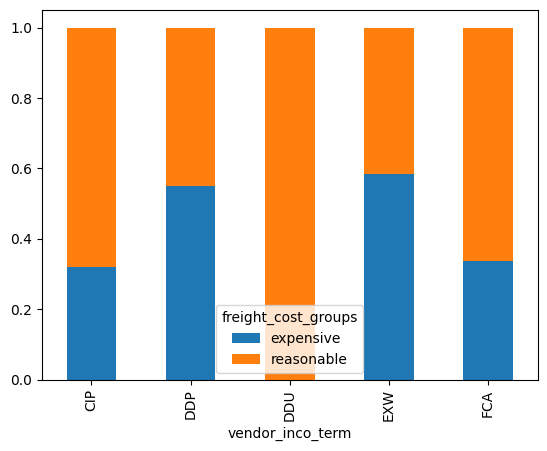


      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


/home/umut/.local/pipx/venvs/jupyterlab/lib/python3.11/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/home/umut/.local/pipx/venvs/jupyterlab/lib/python3.11/site-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/home/umut/.local/pipx/venvs/jupyterlab/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7416: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/umut/.local/pipx/venvs/jupyterlab/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7416: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/umut/.local/pipx/venvs/jupyterlab/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7413: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy

In [31]:
late_shipments = pd.read_feather('late_shipments.feather')
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x='freight_cost_groups', y='vendor_inco_term')

# Print results
print()
print(stats[stats['test'] == 'pearson'])

## Goodness Of Fit

In [25]:
#H0: The sample matches the hypothesized distribution
#HA: The sample doesn't match the hypothesized distribution

In [26]:
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts = purple_link_counts.rename_axis('purple_link').reset_index(name='n').sort_values('purple_link')

In [27]:
hypothesized = pd.DataFrame({'purple_link': ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'], 'prop': [1/6, 1/6, 1/2, 1/6]})

alpha=0.01

In [28]:
n_total = len(stack_overflow)
hypothesized["n"] = hypothesized["prop"] * n_total

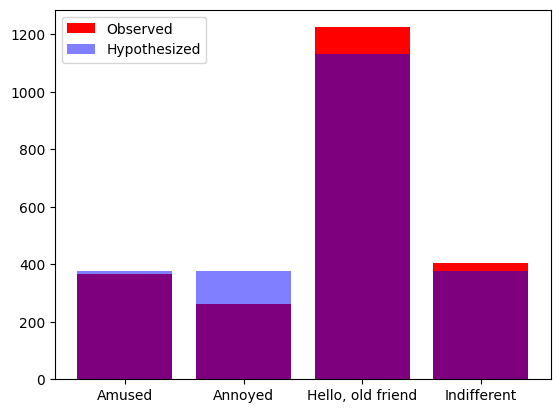

In [29]:
plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color='red', label='Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.5, color='blue', label='Hypothesized')
plt.legend()
plt.show()

In [30]:
from scipy.stats import chisquare
print(chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesized['n']))

print('Our p value < alpha, we can not reject H0.')

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)
Our p value < alpha, we can not reject H0.


## Non-parametric Test

In [35]:
repub_votes_small = repub_votes.sample(5)
repub_votes_small

,state,county,repub_percent_08,repub_percent_12
7,Florida,Citrus,57.388587,60.407114
86,Utah,Tooele,63.436581,74.077151
32,Kentucky,Jessamine,67.829227,68.981728
62,North Dakota,McHenry,56.870861,61.873156
93,West Virginia,Morgan,60.857614,64.068711


In [40]:
#Wilcoxon Test
alpha = 0.01

wilcoxon_test_result = pingouin.wilcoxon(x=repub_votes_small['repub_percent_08'], 
                                         y=repub_votes_small['repub_percent_12'], 
                                         alternative='less')
print(wilcoxon_test_result)
print('p value > alpha, we can not reject H0')

          W-val alternative    p-val  RBC  CLES
Wilcoxon    0.0        less  0.03125 -1.0  0.76
p value > alpha, we can not reject H0


In [42]:
#Wilcoxon-Mann-Whitney Test
age_vs_comp = stack_overflow[['converted_comp','age_first_code_cut']]

age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', 
                                     values='converted_comp')

print('Age_vs_Comp\n',age_vs_comp)
print('\nAge_vs_Comp After Pivot\n', age_vs_comp_wide)

alpha=0.01
pingouin.mwu(x=age_vs_comp_wide['child'], 
             y=age_vs_comp_wide['adult'], 
             alternative='greater')

Age_vs_Comp
       converted_comp age_first_code_cut
0            77556.0              adult
1            74970.0              child
2           594539.0              child
3          2000000.0              adult
4            37816.0              adult
...              ...                ...
2256        145000.0              child
2257         33972.0              child
2258         97284.0              child
2259         72000.0              child
2260        180000.0              child

[2261 rows x 2 columns]

Age_vs_Comp After Pivot
 age_first_code_cut      adult     child
0                     77556.0       NaN
1                         NaN   74970.0
2                         NaN  594539.0
3                   2000000.0       NaN
4                     37816.0       NaN
...                       ...       ...
2256                      NaN  145000.0
2257                      NaN   33972.0
2258                      NaN   97284.0
2259                      NaN   72000.0
2260            

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,-0.222516,0.611258


In [44]:
#Kruskal-Wallis Test nedir ?
alpha = 0.01

pingouin.kruskal(data=stack_overflow, dv='converted_comp', between= 'job_sat')

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15
